## **Mid Course Assessment - ML Case Study**

#### **Project Name**    - Rainfall Prediction

#### **Project Type**  - Logistic Regression

#### __Name__  - Ravi Sharma

#### __github link:__  *https://github.com/RaviSharma1901/Modulr-6/blob/main/Mid_Course_Assessment_ML_Case_Study_Ravi_Sahrma.ipynb*

## **Project Summary -**        

The Rainfall Prediction project leverages machine learning techniques to predict the occurrence of rainfall based on meteorological data. Using a logistic regression approach, the project aims to classify whether it will rain ("Rainfall") or not ("No Rainfall") based on key weather features like pressure, dew point, humidity, cloud cover, sunshine duration, wind direction, and wind speed.

## **Problem Statement**        

Accurate and timely rainfall prediction is critical for sectors like agriculture, water resource management, urban planning, and disaster preparedness. However, predicting rainfall poses significant challenges due to the complexity and variability of weather patterns.



## **Data Description**

The dataset for the Rainfall Prediction project consists of meteorological parameters collected from historical weather records. These parameters are crucial for predicting rainfall and are used as input features for the machine learning model. Below is a description of the dataset:

__(Variables):__

__day:__ The specific day or date of observation.       
__pressure:__ The atmospheric pressure, typically measured in hPa or mmHg.      
__maxtemp:__ The maximum temperature recorded during the day.       
__temperature:__ The average or current temperature for the day.        
__mintemp:__ The minimum temperature recorded during the day.       
__dewpoint:__ The temperature at which the air becomes saturated and condensation begins, often associated with humidity.       
__humidity:__ The percentage of moisture present in the air.        
__cloud:__ The measure or percentage of cloud cover in the sky.     
__rainfall:__ The amount of rainfall, usually measured in millimeters (mm).     
__sunshine:__ The duration or intensity of sunlight during the day, often in hours.     
__winddirection:__ The direction from which the wind is blowing, generally in degrees or compass directions (e.g., N, NE).      
__windspeed:__ The speed of the wind, typically measured in meters per second (m/s) or kilometers per hour (km/h).      

__Target Variable (Output):__

__Rainfall (Binary):__ Indicates whether rainfall occurs (1) or not (0). This is the classification target


## ***Let's Begin !***

#### __Import the Dependencies__

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression


#### __Data Collection and Processing__

In [157]:
# Load the dataset
data = pd.read_csv("Rainfall.csv")

In [158]:
# check types of data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [159]:
#check the head of the data
data.head()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [160]:
# check the shape of the data
data.shape

(366, 12)

In [161]:
# check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [162]:
# remove extra spaces in all column names if avaliable
data.columns = data.columns.str.strip()

In [163]:
# check the columns of the data
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [164]:
# check the unique values of the "day" column
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [165]:
# In this model day column not require so remove it
dt = data.drop("day", axis=1)


In [166]:
# check the number of null values in the data
dt.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [167]:
# check the unique values of the "winddirection" column
dt["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [168]:
# handle missing values

# 'winddirection' column seems like numerical but can treat as categorical so replace it with mode
dt["winddirection"] = dt["winddirection"].fillna(dt["winddirection"].mode()[0])

dt["windspeed"] = dt["windspeed"].fillna(dt["windspeed"].median())

In [169]:
dt.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [170]:
# rainfall is a target value so convert it into binary
dt["rainfall"] = dt["rainfall"].apply(lambda x: 1 if x =='yes' else 0)

#### __EDA__

In [171]:
dt.shape

(366, 11)

In [172]:
dt.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [173]:
dt.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

__Distribution of Features__

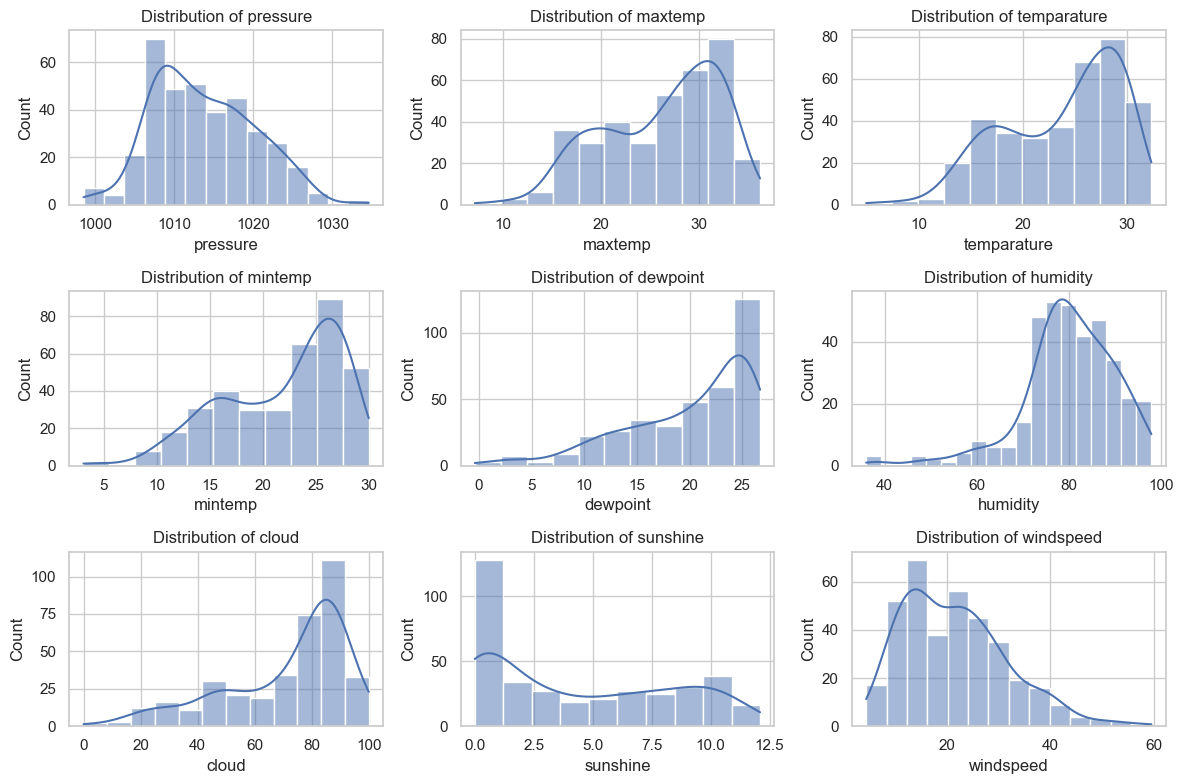

In [ ]:
# Check the distribution of the features

plt.figure(figsize=(12, 8))

features = dt.iloc[:, list(range(0, 7)) + [8, 10]] # select the features(columns) not category columns
# i start with 1
for i, col in enumerate(features,1): # i start with 1
        plt.subplot(3, 3, i)
        sns.histplot(dt[col], kde=True)
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

*We have to standardize the features after the split training data to make the data have a mean of 0 and a standard deviation of 1.*

*The mean being essentially zero (with a very small rounding error) and the standard deviation being 1 confirm that your data has been successfully standardized.*

__Distribution of Target Value(Rainfall)__

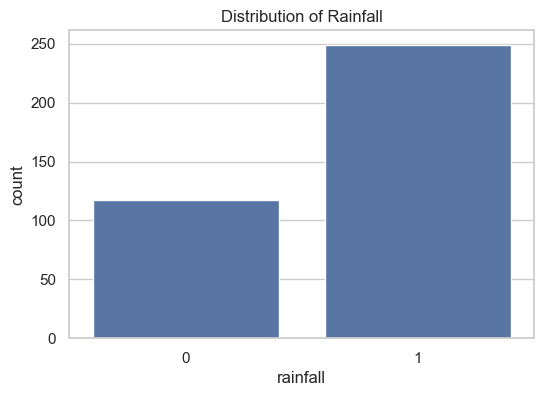

In [ ]:
# check the distribution for the target value('rainfall')
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=dt)
plt.title("Distribution of Rainfall")
plt.show()

*The target value is unbalanced, so I used the SMOTE technique after splitting the data into training and testing sets, during the data preprocessing stage.*

__Check the Correlation between features__

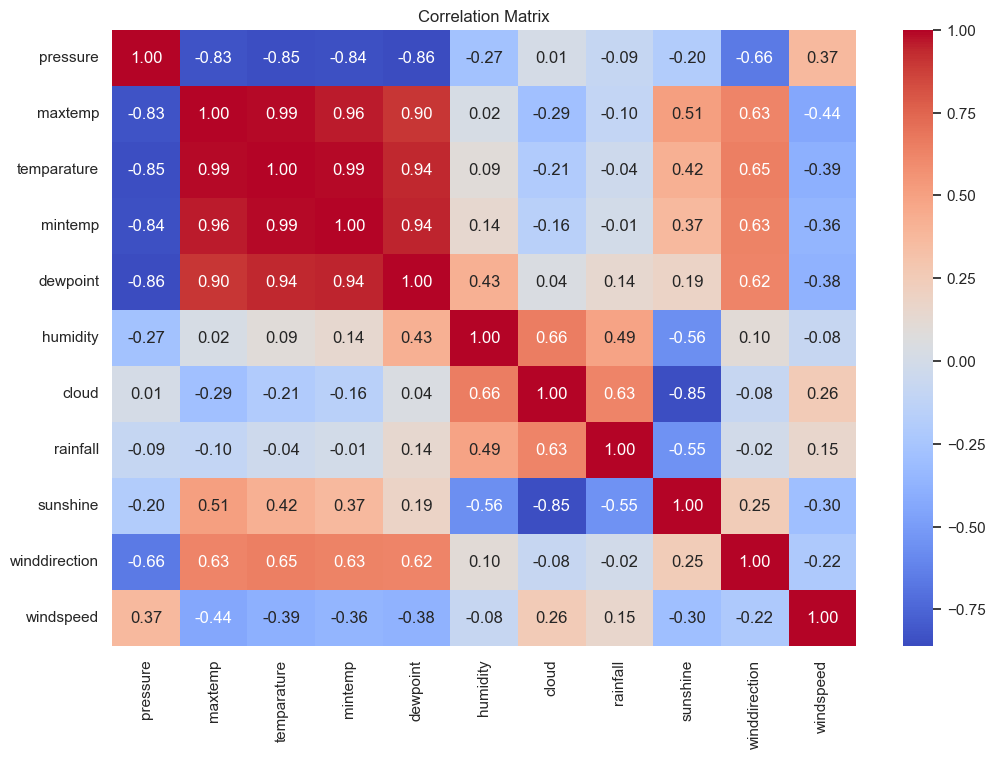

In [176]:
# check the correlation of the data
plt.figure(figsize=(12, 8))
sns.heatmap(dt.corr(), annot=True, cmap="coolwarm", fmt=".2f") # annot=show the correlation values, fmt=show the values in 2 decimal
plt.title("Correlation Matrix")
plt.show()

*Since four columns (maxtemp, temperature, mintemp, and dewpoint) are highly correlated, we will choose one representative column and remove the rest during the data preprocessing step. Multicollinearity is present here, and it can distort model results.*




__Check the Outliers__

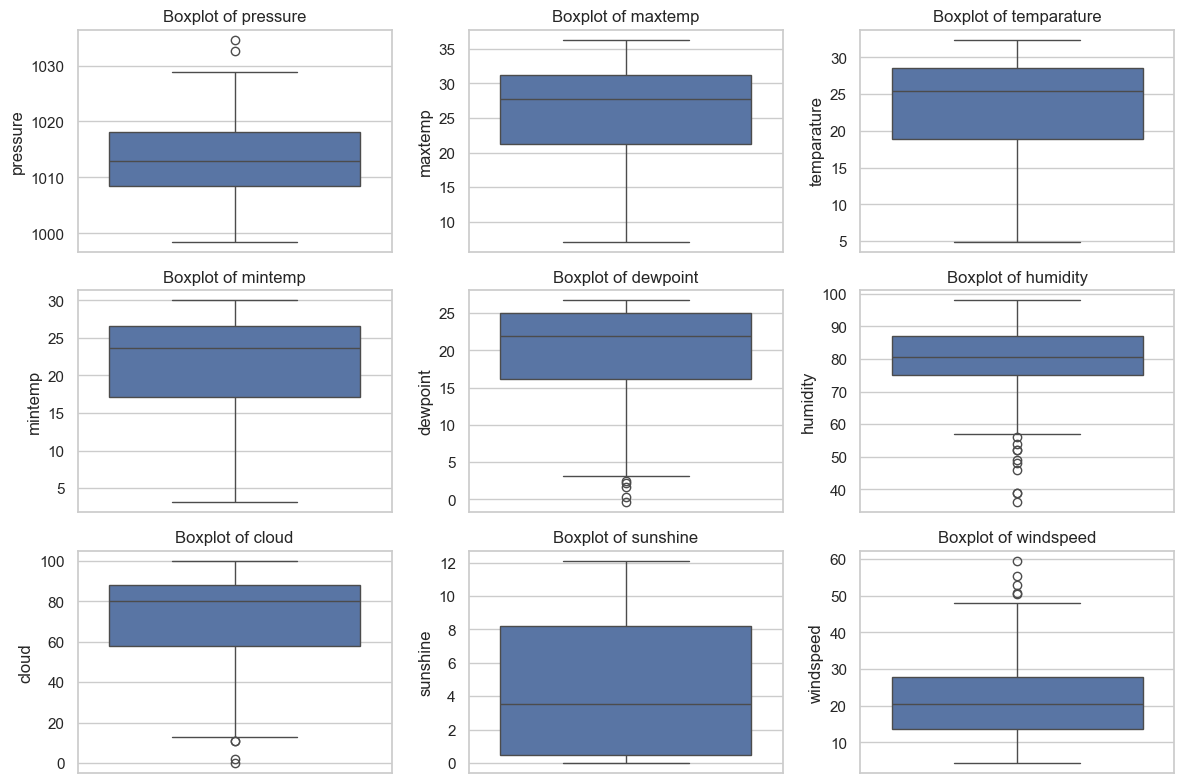

In [177]:
# check the outliers by the boxplots of the features

plt.figure(figsize=(12, 8))

features = dt.iloc[:, list(range(0, 7)) + [8, 10]] # select the features(columns) not category columns

for i, col in enumerate(features,1): # i start with 1
        plt.subplot(3, 3, i)
        sns.boxplot(dt[col])
        plt.title(f"Boxplot of {col}")
        
plt.tight_layout()
plt.show()

*Looking at the boxplots, the outliers do not seem to be extreme enough to significantly affect your regression model. If the range of the bulk of the data (inside the interquartile range) is wide, and the outliers are not drastically different, they may have a minimal impact.*

#### __Data Preprocessing__

In [178]:
# Drop highly correlated features and have one of them(like dewpoint)

dt = dt.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [151]:
dt.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


__Split the Data into Train and Test Sets__



In [179]:
# Split into training and test sets

X = dt.drop("rainfall", axis=1)  # Features
y = dt["rainfall"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__standardize the features__

In [180]:
# standardize the features

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)


In [ ]:
print(X_train_standardized.mean())  # Should be close to 0
print(X_train_standardized.std())   # Should be close to 1

-1.4973888621754558e-15
1.0


*The mean being essentially zero (with a very small rounding error) and the standard deviation being 1 confirm that your data has been successfully standardized.*

__Apply the smote__

In [183]:
# apply the smote to the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_standardized, y_train)

In [192]:
print(X_train_resampled.shape, y_train_resampled.shape)


(396, 7) (396,)


*After applying SMOTE, achieving a balanced total of 396 instances means the algorithm successfully generated synthetic samples for the minority class. This ensures that your model will have a fair chance to learn from both classes, reducing bias toward the majority class*

__standardize the test data__

In [184]:
# standardize the test data
X_test_standardized = scaler.transform(X_test)

In [ ]:
print(X_test_standardized.mean())  # Should be close to 0
print(X_test_standardized.std())   # Should be close to 1

-0.033125594971598615
1.0524819714861227


*After standardization, the test data's mean being close to 0 and standard deviation close to 1 confirms successful scaling.*

#### __Train the Modal__



In [193]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [222]:
# Make predictions on the test set
y_pred = model.predict(X_test_standardized)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.48      0.51        23
           1       0.78      0.82      0.80        51

    accuracy                           0.72        74
   macro avg       0.66      0.65      0.66        74
weighted avg       0.71      0.72      0.71        74

Accuracy: 0.7162162162162162


 __*Class 0 (Minority Class):*__

*Precision: 0.55 indicates that 55% of the predictions for class 0 (non-rainfall) are correct.*     
*Recall: 0.48 means that only 48% of actual class 0 instances are correctly identified.*        
*F1-Score: 0.51 is the harmonic mean of precision and recall, showing a balance between the two.*
*Support: 23 actual cases in the test set.*
   

__*Class 1 (Majority Class):*__

*Precision: 0.78 shows that 78% of predictions for class 1 (rainfall) are correct.*       
*Recall: 0.82 indicates that 82% of actual class 1 instances are correctly identified*        
*F1-Score: 0.80 demonstrates strong overall performance for the majority class.*
*Support: There are 51 actual cases in the test set.*


__*Matrics:*__

*Accuracy: 71.6% reflects the percentage of correctly classified instances in the entire dataset.*        
*Macro Average: 0.66 shows the average performance across both classes, treating them equally.*        
*Weighted Average: 0.71 accounts for class imbalance by giving more weight to the majority class.*



__Prediction on unknown data__



In [252]:
# Standardize the input data using the same scaler
input_data = (1025.9, 19.1, 72, 99, 1, 9.3, 26.3)
input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
input_data_standardized = scaler.transform(input_df)  # Standardize features

In [253]:
# Make prediction
prediction = model.predict(input_data_standardized)

# Print prediction result
print(prediction[0])  # Assuming binary prediction
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

1
Prediction result: Rainfall
